# rf409_NumPyPandasToRooFit
Convert between NumPy arrays or Pandas DataFrames and RooDataSets.

This tutorials first how to export a RooDataSet to NumPy arrays or a Pandas
DataFrame, and then it shows you how to create a RooDataSet from a Pandas
DataFrame.




**Author:** Jonas Rembser  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:18 AM.</small></i>

In [1]:
import ROOT

import numpy as np

The number of events that we use for the datasets created in this tutorial.

In [2]:
n_events = 10000

Creating a RooDataSet and exporting it to the Python ecosystem
--------------------------------------------------------------

Define the observable.

In [3]:
x = ROOT.RooRealVar("x", "x", -10, 10)

Define a Gaussian model with its parameters.

In [4]:
mean = ROOT.RooRealVar("mean", "mean of gaussian", 1, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1, 0.1, 10)
gauss = ROOT.RooGaussian("gauss", "gaussian PDF", x, mean, sigma)

Create a RooDataSet.

In [5]:
data = gauss.generate(ROOT.RooArgSet(x), 10000)

Use RooDataSet.to_numpy() to export dataset to a dictionary of NumPy arrays.
Real values will be of type `double`, categorical values of type `int`.

In [6]:
arrays = data.to_numpy()

We can verify that the mean and standard deviation matches our model specification.

In [7]:
print("Mean of numpy array:", np.mean(arrays["x"]))
print("Standard deviation of numpy array:", np.std(arrays["x"]))

Mean of numpy array: 1.0066466535473984
Standard deviation of numpy array: 0.9973499677811349


It is also possible to create a Pandas DataFrame directly from the numpy arrays:

In [8]:
df = data.to_pandas()

Now you can use the DataFrame e.g. for plotting. You can even combine this
with the RooAbsReal.bins PyROOT function, which returns the binning from
RooFit as a numpy array!

In [9]:
try:
    import matplotlib.pyplot as plt

    df.hist(column="x", bins=x.bins())
except Exception:
    print(
        'Skipping `df.hist(column="x", bins=x.bins())` because matplotlib could not be imported or was not able to display the plot.'
    )

del data
del arrays
del df

Creating a dataset with NumPy and importing it to a RooDataSet
--------------------------------------------------------------

Now we create some Gaussian toy data with numpy, this time with a different
mean.

In [10]:
x_arr = np.random.normal(-1.0, 1.0, (n_events,))

Import the data to a RooDataSet, passing a dictionary of arrays and the
corresponding RooRealVars just like you would pass to the RooDataSet
constructor.

In [11]:
data = ROOT.RooDataSet.from_numpy({"x": x_arr}, [x])

Let's fit the Gaussian to the data. The mean is updated accordingly.

In [12]:
fit_result = gauss.fitTo(data, PrintLevel=-1, Save=True)
fit_result.Print()

[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 14050.9, estimated distance to minimum: 4.12418e-08
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                  mean   -9.9417e-01 +/-  9.86e-03
                 sigma    9.8624e-01 +/-  6.97e-03



We can now plot the model and the dataset with RooFit.

In [13]:
xframe = x.frame(Title="Gaussian pdf")
data.plotOn(xframe)
gauss.plotOn(xframe)

Draw RooFit plot on a canvas.

In [14]:
c = ROOT.TCanvas("rf409_NumPyPandasToRooFit", "rf409_NumPyPandasToRooFit", 800, 400)
xframe.Draw()
c.SaveAs("rf409_NumPyPandasToRooFit.png")

Info in <TCanvas::Print>: png file rf409_NumPyPandasToRooFit.png has been created


Exporting a RooDataHist to NumPy arrays for histogram counts and bin edges
--------------------------------------------------------------------------

In [15]:
def print_histogram_output(histogram_output):
    counts, bin_edges = histogram_output
    print(np.array(counts, dtype=int))
    print(bin_edges[0])

Create a binned clone of the dataset to show RooDataHist to NumPy export.

In [16]:
datahist = data.binnedClone()

You can also export a RooDataHist to numpy arrays with
RooDataHist.to_numpy(). As output, you will get a multidimensional array with
the histogram counts and a list of arrays with bin edges. This is comparable
to the output of numpy.histogram (or numpy.histogramdd for the
multidimensional case).

In [17]:
counts, bin_edges = datahist.to_numpy()

print("Counts and bin edges from RooDataHist.to_numpy:")
print_histogram_output((counts, bin_edges))

Counts and bin edges from RooDataHist.to_numpy:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   1   4   2   8   9  13  40  60  83 115
 171 229 338 453 528 680 716 715 824 799 770 687 626 535 442 351 275 180
 136  89  52  35  16   5   4   4   1   1   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.

Let's compare the output to the counts and bin edges we get with
numpy.histogramdd when we pass it the original samples:

In [18]:
print("Counts and bin edges from np.histogram:")
print_histogram_output(np.histogramdd([x_arr], bins=[x.bins()]))

Counts and bin edges from np.histogram:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   1   4   2   8   9  13  40  60  83 115
 171 229 338 453 528 680 716 715 824 799 770 687 626 535 442 351 275 180
 136  89  52  35  16   5   4   4   1   1   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.  

The array values should be the same!

Importing a RooDataHist from NumPy arrays with histogram counts and bin edges
-----------------------------------------------------------------------------

There is also a `RooDataHist.from_numpy` function, again with an interface
inspired by `numpy.histogramdd`. You need to pass at least the histogram
counts and the list of variables. The binning is optional: the default
binning of the RooRealVars is used if not explicitly specified.

In [19]:
datahist_new_1 = ROOT.RooDataHist.from_numpy(counts, [x])

print("RooDataHist imported with default binning and exported back to numpy:")
print_histogram_output(datahist_new_1.to_numpy())

RooDataHist imported with default binning and exported back to numpy:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   1   4   2   8   9  13  40  60  83 115
 171 229 338 453 528 680 716 715 824 799 770 687 626 535 442 351 275 180
 136  89  52  35  16   5   4   4   1   1   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.  

It's also possible to pass custom bin edges to `RooDataHist.from_numpy`, just
like you pass them to `numpy.histogramdd` when you get the counts to fill the
RooDataHist with:

In [20]:
bins = [np.linspace(-10, 10, 21)]
counts, _ = np.histogramdd([x_arr], bins=bins)
datahist_new_2 = ROOT.RooDataHist.from_numpy(counts, [x], bins=bins)

print("RooDataHist imported with linspace binning and exported back to numpy:")
print_histogram_output(datahist_new_2.to_numpy())

RooDataHist imported with linspace binning and exported back to numpy:
[   0    0    0    0    0   17  205 1306 3463 3417 1384  197   10    1
    0    0    0    0    0    0]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


Alternatively, you can specify only the number of bins and the range if your
binning is uniform. This is preferred over passing the full list of bin
edges, because RooFit will know that the binning is uniform and do some
optimizations.

In [21]:
bins = [20]
ranges = [(-10, 10)]
counts, _ = np.histogramdd([x_arr], bins=bins, range=ranges)
datahist_new_3 = ROOT.RooDataHist.from_numpy(counts, [x], bins=bins, ranges=ranges)

print("RooDataHist imported with uniform binning and exported back to numpy:")
print_histogram_output(datahist_new_3.to_numpy())

RooDataHist imported with uniform binning and exported back to numpy:
[   0    0    0    0    0   17  205 1306 3463 3417 1384  197   10    1
    0    0    0    0    0    0]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


Draw all canvases 

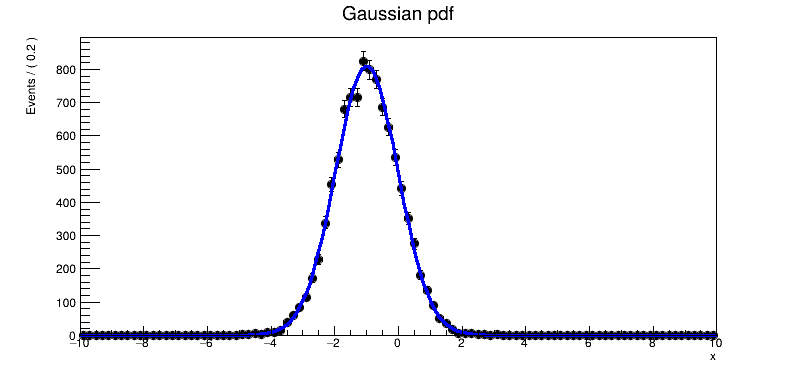

In [22]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()